# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In order to figure out what drives the price of a car, we basically need to use some regression models so we can do some prediction on the car prices based on several vehicle attributes such as odometer, year, title status, vehicle type, etc. We can then find the relationship amongs these attributes and feature importance, this way we can identify which features that have the most impact to the car price. In this analysis, we may use several regression models such as Linear, Lasso, Ridge and Random Forest regression for comparison of which models produce better results.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Import Some Modules
Let's import some modules that we think we need to use it in our analysis.

In [69]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

#### Load Vehicle Data & Examine Data

In [5]:
# Load Data
df = pd.read_csv("data/vehicles.csv") 

In [6]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Some more info about the data columns 
1.   Region (Example: columbus, jacksonville, eugene, freno, ...)
2.   Price (price of the car)
3.   Year (year of the car)
4.   manufacturer  (Example: ford, toyota, honda, ...) 
5.   model  (f-150, camry, silverado, ...)      
6.   condition  (good, excellent, like new, fair, new, salvage)   
7.   cylinders  (6 cylinders, 4 cylinders, ...)
8.   fuel  (gas, diesel, hybrid, electric, other) 
9.   odometer  (mileage reading of the car)  
10.  title_status  (clean, rebuilt, salvage, lien, missing, parts only)
11.  transmission  (automatic, manual, other)
12.  VIN  (VIN of the car)
13.  drive  (4wd, fwd, rwd)    
14.  size (full-size, mid-size, compact, sub-compact)     
15.  type (sedan, SUV, pickup, truck, other, hatchback, coupe, wagon, van, convertible, mini-van, offroad, bus)    
16.  paint_color  (white, black, silver, blue, ...)
17.  state  (ca, fl, tx, ny, oh, ...)

In [9]:
# Notice, there are cars that worth $1 & $3.7B and odometer 10M
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [10]:
# Count number of rows
df.count()

id              426880
region          426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
state           426880
dtype: int64

In [11]:
# Check for missing values
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [12]:
# Make a copy of the original DataFrame so we can refer back later if needed
df_org = df.copy()

### Data Clean-up

Let's do some clean-up such as fill some N/A values for both numerical and categorical features.


In [13]:
# MISSING DATA
# - condition    174104
# - cylinders    177678
# - VIN          161042
# - drive        130567
# - size         306361
# - paint_color  130203

# The number of missing data is pretty significant for the above features, 
# Dropping these features as this won't be useful
drop_columns = ['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color']
df = df.drop(columns=drop_columns)

# For numerical features, let's impute with median
numeric_imputer = SimpleImputer(strategy='median')
df[['year', 'odometer']] = numeric_imputer.fit_transform(df[['year', 'odometer']])

# For categorical features, let's impute with 'most_frequent'
simple_imputer = SimpleImputer(strategy='most_frequent')
df[['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'type']] = simple_imputer.fit_transform(df[['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'type']])


In [14]:
# Let's check car prices
# Notices there are significant number of rows that have price = $0
df.price.value_counts()

0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: price, Length: 15655, dtype: int64

In [15]:
# Let's drop rows where the price is $0
df = df[df['price'] > 0]

# Check how many rows now
df.shape[0]

393985

In [17]:
# There are some outlier in 'price' and 'odometer'
# Let's filter only price that between 1000-250K and odometer has max of 300K 
min_price = 1000
max_price = 250000
max_odometer = 300000  

# Filter with the above limit
df = df[
    (df['price'] >= min_price) & (df['price'] <= max_price) &
    (df['odometer'] <= max_odometer)
]

In [18]:
# Convert year into integer type
df = df.astype({"year": int})

### EDA and Data Check

In [20]:
# Check if there is still more missing info 
df.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64

In [21]:
# Check for duplicate rows
df.duplicated().sum()

0

In [22]:
df.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,7222695916,prescott,6000,2013,ford,f-150,gas,85548.0,clean,automatic,sedan,az
1,7218891961,fayetteville,11900,2013,ford,f-150,gas,85548.0,clean,automatic,sedan,ar
2,7221797935,florida keys,21000,2013,ford,f-150,gas,85548.0,clean,automatic,sedan,fl
3,7222270760,worcester / central MA,1500,2013,ford,f-150,gas,85548.0,clean,automatic,sedan,ma
4,7210384030,greensboro,4900,2013,ford,f-150,gas,85548.0,clean,automatic,sedan,nc


In [23]:
df.describe()

,id,price,year,odometer
count,3.778370e+05,377837.000000,377837.000000,377837.00000
mean,7.311455e+09,19560.868253,2011.061032,91674.37780
std,4.478057e+06,15024.801029,9.483399,61727.46701
min,7.207408e+09,1000.000000,1900.000000,0.00000
25%,7.308069e+09,7995.000000,2008.000000,38120.00000
50%,7.312553e+09,15995.000000,2013.000000,86345.00000
75%,7.315238e+09,27990.000000,2017.000000,134610.00000
max,7.317101e+09,249999.000000,2022.000000,300000.00000


#### Plot Some Data
To get much clearer picture and understanding, let's plot some data

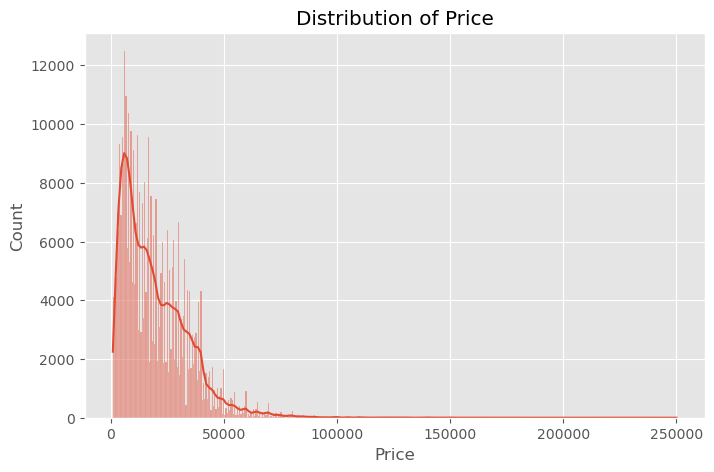

In [25]:
# Visualize Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

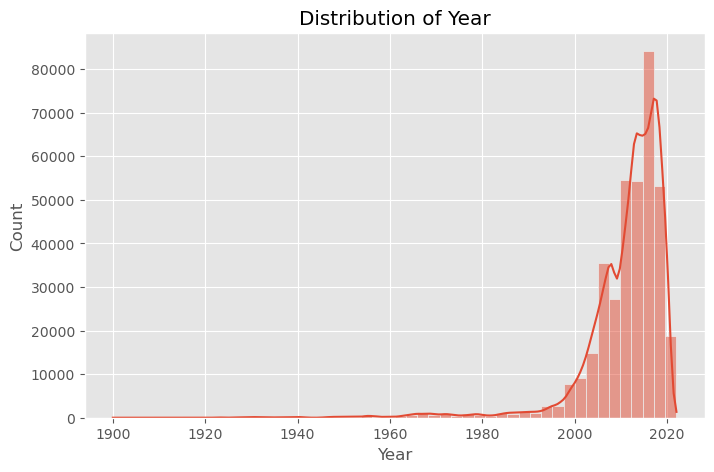

In [27]:
# Visualize Year distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['year'], bins=50, kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

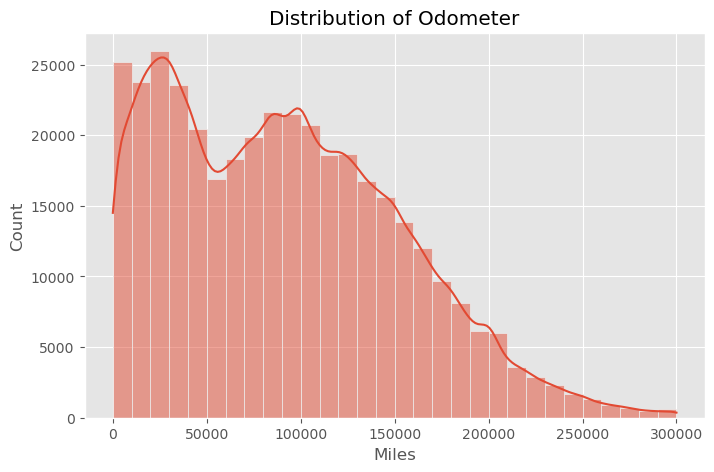

In [28]:
# Visualize Odometer distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['odometer'], bins=30, kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

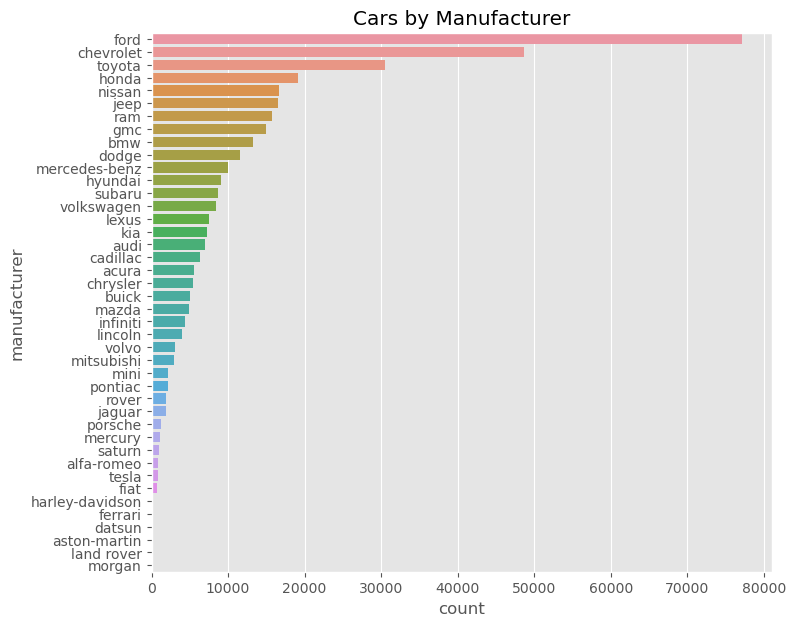

In [29]:
# Visualize Manufacturer distribution
plt.figure(figsize=(8, 7))
sns.countplot(y='manufacturer', data=df, order = df['manufacturer'].value_counts().index)
plt.title('Cars by Manufacturer')
plt.show()

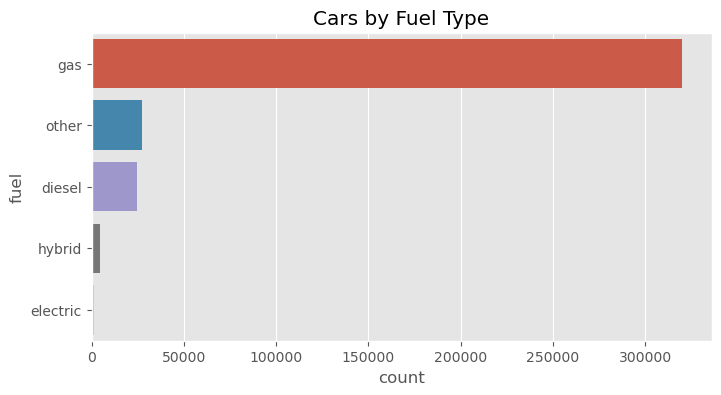

In [30]:
# Visualize Fuel Type distribution
plt.figure(figsize=(8, 4))
sns.countplot(y='fuel', data=df)
plt.title('Cars by Fuel Type')
plt.show()

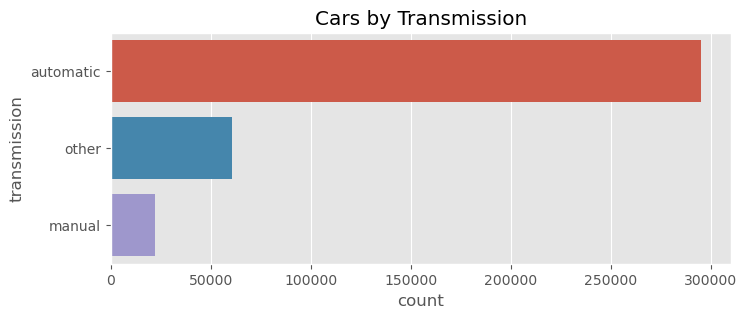

In [31]:
# Visualize Transmission distribution
plt.figure(figsize=(8, 3))
sns.countplot(y='transmission', data=df)
plt.title('Cars by Transmission')
plt.show()

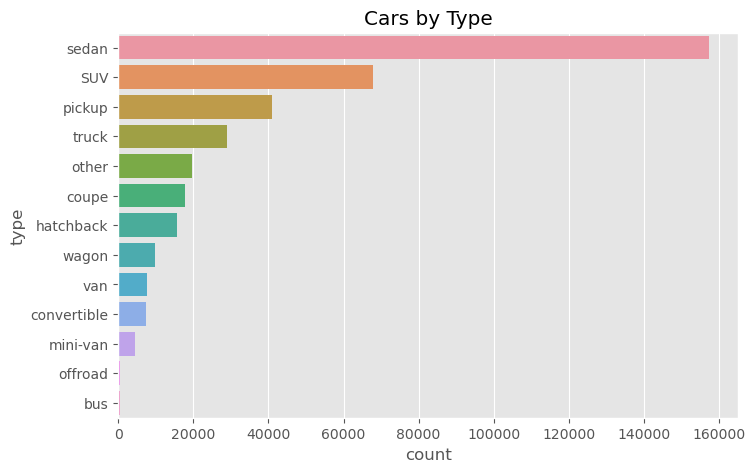

In [32]:
# Visualize Car Type distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='type', data=df, order = df['type'].value_counts().index)
plt.title('Cars by Type')
plt.show()

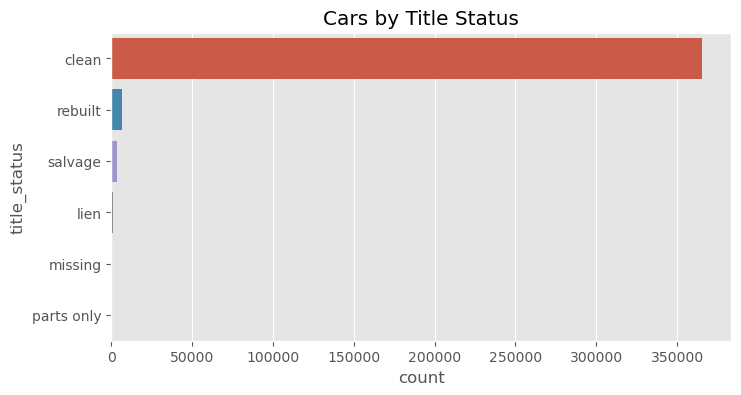

In [33]:
# Visualize Title Status distribution
plt.figure(figsize=(8, 4))
sns.countplot(y='title_status', data=df, order = df['title_status'].value_counts().index)
plt.title('Cars by Title Status')
plt.show()

Correlation between Price and Odometer: -0.5268403478170314


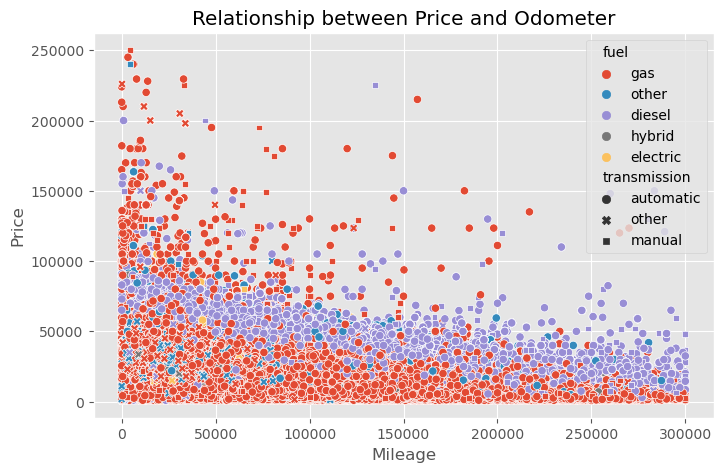

In [34]:
# Visualize the correlation between Price and Odometer
corr_price_odometer = df['price'].corr(df['odometer'])
print("Correlation between Price and Odometer:", corr_price_odometer)

plt.figure(figsize=(8, 5))
sns.scatterplot(x="odometer", y="price", data=df, hue="fuel", style="transmission")
plt.title("Relationship between Price and Odometer")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(True)
plt.show()

Correlation between Price and Year: 0.3480039146689591


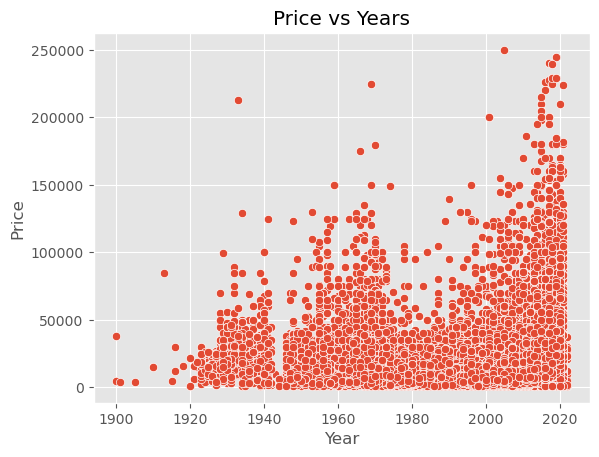

In [35]:
# Visualize the correlation between Price and Years
corr_price_year = df['price'].corr(df['year'])
print("Correlation between Price and Year:", corr_price_year)

sns.scatterplot(x="year", y="price", data=df)
plt.title('Price vs Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

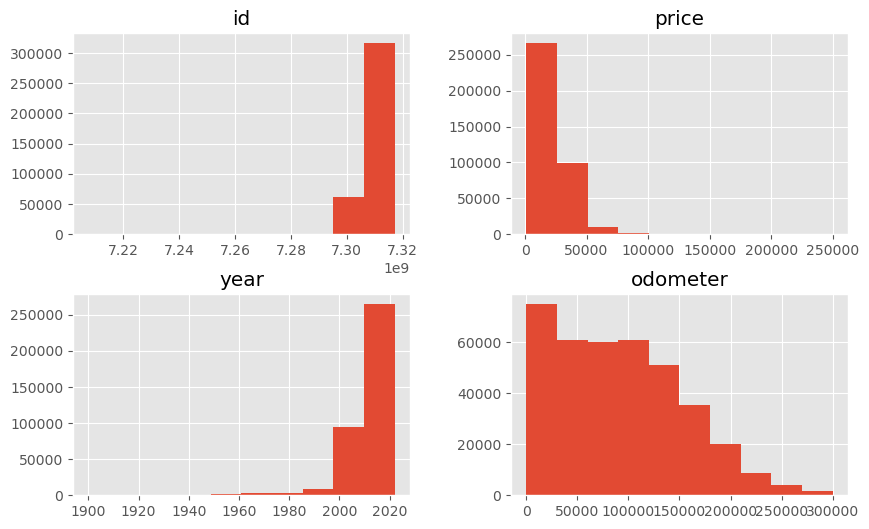

In [36]:
df.hist(figsize = (10, 6));

In [37]:
corr = df.corr(numeric_only = True).round(2)

<AxesSubplot: >

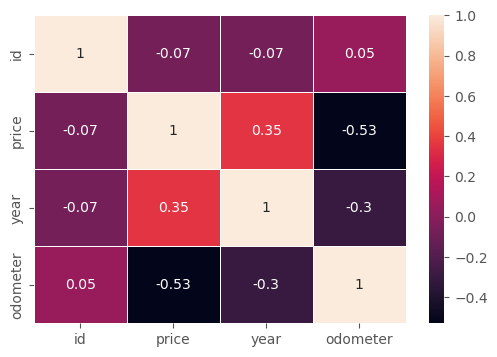

In [39]:
# Visualize Heatmap Correlation
fig, ax = plt.subplots(figsize=(6, 4)) 
sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [40]:
# Make a copy of dataframe
dfn = df.copy()

In [41]:
# Use LabelEncoder to transform categorical data into a numerical format suitable for machine learning
region_le = LabelEncoder()
dfn['region'] = region_le.fit_transform(dfn['region'])
region_le_mapping = dict(zip(region_le.classes_, region_le.transform(region_le.classes_)))

manufacturer_le = LabelEncoder()
dfn['manufacturer'] = manufacturer_le.fit_transform(dfn['manufacturer'])
manufacturer_le_mapping = dict(zip(manufacturer_le.classes_, manufacturer_le.transform(manufacturer_le.classes_)))

model_le = LabelEncoder()
dfn['model'] = model_le.fit_transform(dfn['model'])
model_le_mapping = dict(zip(model_le.classes_, model_le.transform(model_le.classes_)))

fuel_le = LabelEncoder()
dfn['fuel'] = fuel_le.fit_transform(dfn['fuel'])
fuel_le_mapping = dict(zip(fuel_le.classes_, fuel_le.transform(fuel_le.classes_)))

title_status_le = LabelEncoder()
dfn['title_status'] = title_status_le.fit_transform(dfn['title_status'])
title_status_le_mapping = dict(zip(title_status_le.classes_, title_status_le.transform(title_status_le.classes_)))

transmission_le = LabelEncoder()
dfn['transmission'] = transmission_le.fit_transform(dfn['transmission'])
transmission_le_mapping = dict(zip(transmission_le.classes_, transmission_le.transform(transmission_le.classes_)))

type_le = LabelEncoder()
dfn['type'] = type_le.fit_transform(dfn['type'])
type_le_mapping = dict(zip(type_le.classes_, type_le.transform(type_le.classes_)))

state_le = LabelEncoder()
dfn['state'] = state_le.fit_transform(dfn['state'])
state_le_mapping = dict(zip(state_le.classes_, state_le.transform(state_le.classes_)))

In [42]:
print(fuel_le_mapping)

{'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3, 'other': 4}


In [43]:
print(transmission_le_mapping)

{'automatic': 0, 'manual': 1, 'other': 2}


In [44]:
print(title_status_le_mapping)

{'clean': 0, 'lien': 1, 'missing': 2, 'parts only': 3, 'rebuilt': 4, 'salvage': 5}


In [45]:
print(type_le_mapping)

{'SUV': 0, 'bus': 1, 'convertible': 2, 'coupe': 3, 'hatchback': 4, 'mini-van': 5, 'offroad': 6, 'other': 7, 'pickup': 8, 'sedan': 9, 'truck': 10, 'van': 11, 'wagon': 12}


In [46]:
dfn

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,7222695916,277,6000,2013,13,12804,2,85548.0,0,0,9,3
1,7218891961,105,11900,2013,13,12804,2,85548.0,0,0,9,2
2,7221797935,111,21000,2013,13,12804,2,85548.0,0,0,9,9
3,7222270760,396,1500,2013,13,12804,2,85548.0,0,0,9,19
4,7210384030,131,4900,2013,13,12804,2,85548.0,0,0,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,397,23590,2019,31,17833,2,32226.0,0,2,9,50
426876,7301591187,397,30590,2020,41,21368,2,12029.0,0,2,9,50
426877,7301591147,397,34990,2020,6,26485,0,4174.0,0,2,4,50
426878,7301591140,397,28990,2018,23,12140,2,30112.0,0,2,9,50


In [47]:
# Split data into X and y
X = dfn.drop(['price'], axis=1)
y = dfn[['price']]

In [48]:
# Split data into training and test data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [49]:
print("Training data X shape: ", X_train.shape)
print("Training data y shape: ", y_train.shape)
print("Test data X shape: ", X_test.shape)
print("Test data y shape: ", y_test.shape)

Training data X shape:  (302269, 11)
Training data y shape:  (302269, 1)
Test data X shape:  (75568, 11)
Test data y shape:  (75568, 1)


In [50]:
# creating the transformed version which will be updated
X_train_transformed = X_train
X_test_transformed = X_test

In [51]:
# intiate the MinMax Scaler
scale = StandardScaler()

# fit transform on the train data 
X_train_transformed[:] = scale.fit_transform(X_train[:])

# Test data
X_test_transformed[:] = scale.transform(X_test[:])

In [52]:
X_train_transformed

,id,region,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
50045,0.349476,0.781211,0.309307,-1.002244,1.036665,2.632970,0.128772,-0.178181,-0.509738,0.352355,-1.290643
382843,-0.213135,0.899775,-0.322338,-0.742427,-0.840033,-0.031174,1.561711,-0.178181,-0.509738,0.621494,1.282832
300788,0.002744,0.433987,-0.322338,-0.482609,-1.217409,-0.031174,-0.506689,-0.178181,-0.509738,0.890634,0.754940
110520,-1.119948,0.967526,-0.848709,-1.002244,0.150651,-0.031174,-0.286678,-0.178181,-0.509738,0.621494,-0.960710
359256,0.874369,0.306954,0.519855,1.076295,-1.115427,-0.031174,-0.324379,-0.178181,-0.509738,0.621494,1.216846
...,...,...,...,...,...,...,...,...,...,...,...
229996,1.019846,-1.539259,-0.006516,0.643266,0.860000,-0.031174,-0.067380,-0.178181,-0.509738,0.621494,0.227048
42120,0.894508,0.544082,-0.638161,1.769141,1.230021,-0.031174,2.345381,-0.178181,-0.509738,0.352355,-1.290643
46532,0.528857,0.772742,-0.322338,-0.482609,-0.328001,-0.031174,-0.043700,-0.178181,-0.509738,0.890634,-1.290643
286024,0.399613,-0.573808,-1.375080,1.595929,0.288560,-0.031174,1.269963,-0.178181,-0.509738,0.621494,0.293034


### Modeling & Evaluation

**Modeling:** With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Evaluation:** With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [70]:
# let's create a simple function to evaluate model (score)
def show_scores(model, X_train, X_test, y_train, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Test R^2": r2_score(y_test, test_preds)}
    return scores

#### Linear Regression

In [71]:
# Use LinearRegression
lin = LinearRegression()
lin.fit(X_train_transformed, y_train)

LinearRegression()

In [72]:
show_scores(lin, X_train_transformed, X_test_transformed, y_train, y_test)

{'Training MAE': 8495.691866372785,
 'Test MAE': 8503.606798688252,
 'Training R^2': 0.36501084720348986,
 'Test R^2': 0.3652578751050414}

#### Ridge

In [73]:
# In scikit-learn, the regularization parameter is denoted by alpha
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train_transformed, y_train)

Ridge(alpha=0.5)

In [74]:
show_scores(ridge, X_train_transformed, X_test_transformed, y_train, y_test)

{'Training MAE': 8495.691395842616,
 'Test MAE': 8503.606381350799,
 'Training R^2': 0.36501084720257027,
 'Test R^2': 0.3652578617287846}

#### Ridge (Evaluate the result)

In [75]:
ridge.coef_

array([[ -428.67757554,  -148.42309832,  3198.63814522,  -690.14063639,
          164.76519712, -3008.05382127, -7111.91087923, -1277.1418306 ,
          964.44277307,   284.05708008,    88.60102949]])

In [76]:
# Match coef's of features to columns
feature_dict = dict(zip(dfn.columns, list(ridge.coef_[0])))
feature_dict

{'id': -428.6775755445537,
 'region': -148.42309831928594,
 'price': 3198.6381452236687,
 'year': -690.1406363943676,
 'manufacturer': 164.76519712349705,
 'model': -3008.0538212742276,
 'fuel': -7111.910879234314,
 'odometer': -1277.14183060147,
 'title_status': 964.4427730732498,
 'transmission': 284.0570800831279,
 'type': 88.60102949257163}

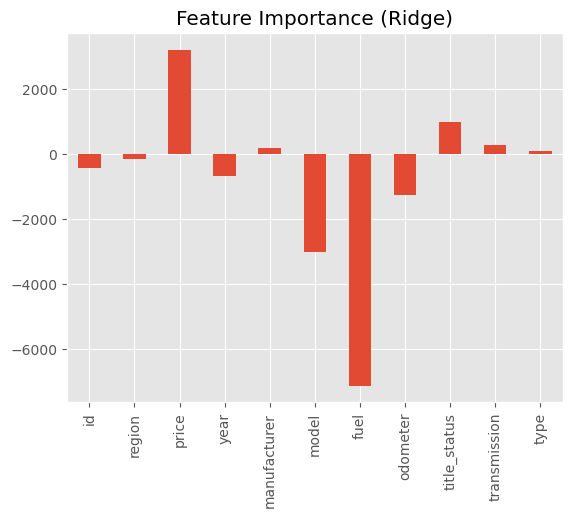

In [77]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance (Ridge)", legend=False);

#### Lasso

In [78]:
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train_transformed, y_train)

Lasso(alpha=0.5)

In [79]:
show_scores(lasso, X_train_transformed, X_test_transformed, y_train, y_test)

{'Training MAE': 8495.735617579227,
 'Test MAE': 8503.660073493671,
 'Training R^2': 0.365010835447414,
 'Test R^2': 0.3652564325900214}

#### Lasso (Evaluate the result)

In [80]:
lasso.coef_

array([ -428.28114979,  -147.95111159,  3198.27981656,  -689.63873622,
         164.19671807, -3007.32031457, -7111.59726991, -1276.67586939,
         963.95485864,   283.50660324,    88.1771303 ])

In [81]:
# Match coef's of features to columns
lasso_feature_dict = dict(zip(dfn.columns, list(lasso.coef_)))
lasso_feature_dict

{'id': -428.2811497892374,
 'region': -147.95111159421612,
 'price': 3198.279816557391,
 'year': -689.6387362172393,
 'manufacturer': 164.19671807303746,
 'model': -3007.3203145668986,
 'fuel': -7111.5972699149515,
 'odometer': -1276.6758693868208,
 'title_status': 963.9548586440122,
 'transmission': 283.50660324416236,
 'type': 88.1771303013577}

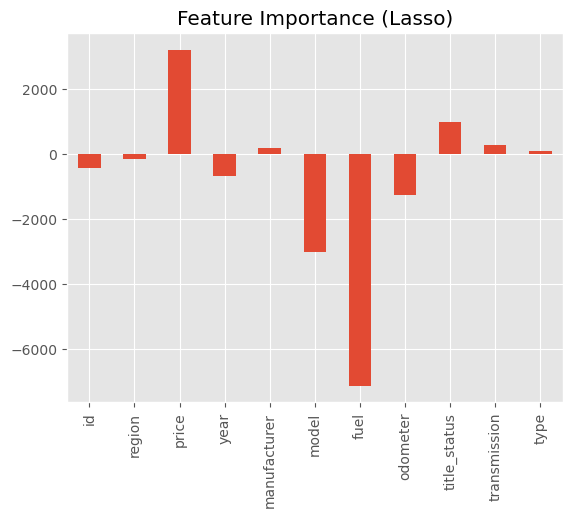

In [82]:
# Visualize feature importance
lasso_feature_df = pd.DataFrame(lasso_feature_dict, index=[0])
lasso_feature_df.T.plot.bar(title="Feature Importance (Lasso)", legend=False);

### Improve Ridge & Lasso by finding best hyperparameters

#### Ridge with GridSearchCV

In [99]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
parameters = {'alpha': alpha}
ridge_grid = GridSearchCV(ridge, 
                          parameters,
                          cv=5, 
                          verbose = 3, 
                          n_jobs = -1, 
                          return_train_score=True)

In [100]:
ridge_grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(alpha=0.5), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             return_train_score=True, verbose=3)

In [101]:
ridge_grid.best_params_

{'alpha': 20}

In [102]:
ridge_ideal = Ridge(alpha = 20)
ridge_ideal.fit(X_train_transformed, y_train)

Ridge(alpha=20)

In [103]:
show_scores(ridge_ideal, X_train_transformed, X_test_transformed, y_train, y_test)

{'Training MAE': 8495.673062933063,
 'Test MAE': 8503.590172652677,
 'Training R^2': 0.3650108457316461,
 'Test R^2': 0.36525733868447985}

Compare with previous Ridge score with Alpha=0.5 \
{'Training MAE': 8495.691395842616, \
 'Test MAE': 8503.606381350799, \
 'Training R^2': 0.36501084720257027, \
 'Test R^2': 0.3652578617287846}

#### Lasso with GridSearchCV

In [90]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
parameters = {'alpha': alpha}
lasso_grid = GridSearchCV(lasso, 
                          parameters,
                          cv=5, 
                          verbose = 3, 
                          n_jobs = -1, 
                          return_train_score=True)

In [92]:
lasso_grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/ping/Documents/Temp/_temp_project_/ML-Course/sample-project/env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.764e+10, tolerance: 5.444e+09
  model = cd_fast.enet_coordinate_descent(
/Users/ping/Documents/Temp/_temp_project_/ML-Course/sample-project/env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.576e+12, tolerance: 5.444e+09
  model = cd_fast.enet_coordinate_descent(
/Users/ping/Documents/Temp/_temp_project_/ML-Course/sample-project/env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did

GridSearchCV(cv=5, estimator=Lasso(alpha=0.5), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             return_train_score=True, verbose=3)

In [93]:
lasso_grid.best_params_

{'alpha': 0.01}

In [94]:
lasso_ideal = Ridge(alpha = 0.01)
lasso_ideal.fit(X_train_transformed, y_train)

Ridge(alpha=0.01)

In [96]:
show_scores(lasso_ideal, X_train_transformed, X_test_transformed, y_train, y_test)

{'Training MAE': 8495.691856962147,
 'Test MAE': 8503.606790341466,
 'Training R^2': 0.36501084720348964,
 'Test R^2': 0.3652578748375336}

Compare with previous Lasso score with Alpha=0.5 \
{'Training MAE': 8495.735617579227, \
 'Test MAE': 8503.660073493671, \
 'Training R^2': 0.365010835447414, \
 'Test R^2': 0.3652564325900214}

### RandomForestRegressor

There is not much improvement for both Ridge and Lasso in terms of MAE and R^2. \
Let's try RandomForestRegressor model

In [105]:
random_reg = RandomForestRegressor(n_jobs=-1, random_state=42)
random_reg.fit(X_train_transformed, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [106]:
show_scores(random_reg, X_train_transformed, X_test_transformed, y_train, y_test)

{'Training MAE': 835.1907270345289,
 'Test MAE': 2255.978635798221,
 'Training R^2': 0.9829408799155616,
 'Test R^2': 0.8770928406756674}

Notice that a quite big improvement in MAE and R^2 with RandomForestRegressor 

#### Hyperparameter tuning with RandomizedSearchCV
Let's tune the Hyperparameter for the RandomForestRegressor to see if we can improve even better.\
For this analysis we are going to use RandomizedSearchCV and limit the iteration to 25 instead of GridSearchCV because it's going to be time consuming.

In [107]:
%%time

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=25,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: user 33.2 s, sys: 2.1 s, total: 35.3 s
Wall time: 38.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [108]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [110]:
%%time

# Most ideal hyperparamters
rs_ideal = RandomForestRegressor(n_estimators=80,
                                 min_samples_split=4,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=None,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42) 
# Fit the ideal model
rs_ideal.fit(X_train, y_train)

CPU times: user 2min 16s, sys: 479 ms, total: 2min 16s
Wall time: 14.4 s


RandomForestRegressor(max_features='auto', min_samples_split=4, n_estimators=80,
                      n_jobs=-1, random_state=42)

In [111]:
show_scores(rs_model, X_train_transformed, X_test_transformed, y_train, y_test)

{'Training MAE': 4231.0013993606135,
 'Test MAE': 4376.688950396221,
 'Training R^2': 0.7596234185521537,
 'Test R^2': 0.7419010577014378}

Notice that the result is worse than the previous one and this should be due to we limit the number of iteration. We can try to improve this by adding more iteration or use GridSearchCV which may need more time to process.\
For this purpose of analysis, we are going to use the previous result.

### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Price).

In [405]:
random_reg.feature_importances_

array([0.03129519, 0.01856886, 0.38442951, 0.0680096 , 0.15489484,
       0.09385559, 0.14606986, 0.00664067, 0.01989235, 0.05690202,
       0.01944152])

In [113]:
# Create a helper function for plotting feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

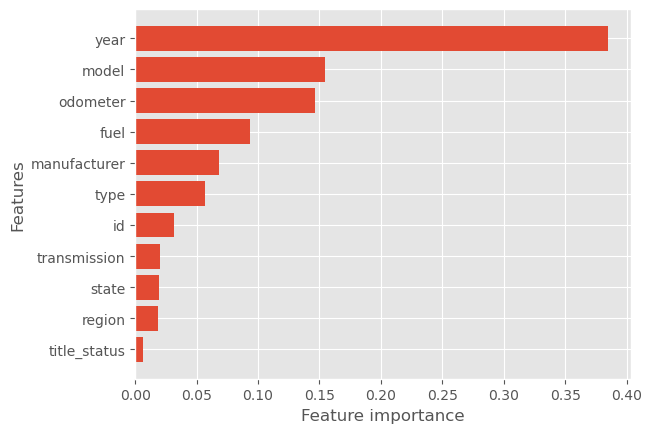

In [114]:
plot_features(X_train_transformed.columns, random_reg.feature_importances_)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Understanding a dataset is crucial for building accurate prediction models. By exploring the data thoroughly, we uncover important insights that help us create effective models capable of revealing hidden patterns. With the help of machine learning, we can harness the potential of our data to make informed decisions and drive innovation.

By looking at our analysis and specifically the feature importance which contains attributes of the data that are most important when it comes to predicting car price, we found the following:

- The newer (year) the car the higher the prices and this more logical for the same car model.
- Cars with different model (or brand) may affect the price also because certain brands may be luxury brand or may be popular but hard to get.
- Cars with lower mileage (Odometer) affect higher prices.
- Certain fuel type such as Hybrid or Electric may impact the price because it can save gas cost for customers.